<a href="https://colab.research.google.com/github/rilgilang/Capstone-Project-2/blob/main/Capstone_Project_2_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
Supermarket ABC, established as the first retail supermarket in the city and has been a pioneer in offering wide variety of products, including meat, fruits, wines, fish, and sweet golds. Over time, the supermarket became a go-to destination for the community, setting a benchmark for quality and variety.

However, as years passed, the retail landscape in the city became increasingly competitive with the emergence of new supermarkets. The growing number of competitors has challenged Supermarket ABC's market position, leading to a noticeable decline in their sales performance.

In response to this challenge, the Management has launched numerous marketing campaigns aimed to boost sales and customer engagement. Despite these efforts, the campaigns have not delivered the expected results, prompting the need for a more data-driven approach.

To address this, the Management has hired a data analyst to examine their customer data, collected from 2012 to 2014. This data includes comprehensive details on customer demographics, purchase histories, product offerings, and the various campaigns conducted during this period. The goal is to uncover insights and develop strategies that will enhance Supermarket ABC's competitiveness and drive sales growth in the increasingly crowded market.
# Problem Statement
The management is seeking a deeper understanding of their customer base and the effectiveness of their past marketing efforts. Their primary goals are to evaluate previous campaigns, understand customer segmentation, and identify potential areas for growth and development.

To address these objectives, the following key questions need to be explored:

How do factors such as birth year, marital status, education, and income levels influence the types of products customers purchase and the quantity of their purchases?
What are the most common channels through which customers make their purchases? Are they primarily using the supermarket’s website, visiting physical stores, or ordering through catalogs?
Which products have the highest and lowest sales values? Identifying these can help tailor inventory and marketing strategies.
How effective have the various types of campaigns been in driving product sales? Understanding this will aid in refining future marketing efforts.
Does offering discounts significantly increase the number of customer purchases? Analyzing this can inform pricing and promotional strategies.
What are the common issues raised by customers, and how can these be addressed to improve customer satisfaction and loyalty?
By answering these questions, the data analyst will provide Supermarket ABC's management with actionable insights to enhance their strategic decisions, ultimately aiming to increase sales and customer satisfaction in a competitive market environment.

In [76]:
import pandas as pd


# Read sample data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supermarket_customer.csv', sep='\t')

# Display the first few rows of the dataframe (optional)
display(df.head(),df.tail())

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning


# Handling Data Format

In [78]:
try:
    # Attempt to parse with day first
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='raise')
except ValueError:
    # If day first fails, try month first
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=False, errors='raise')

df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [79]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    'Missing Value Percentage'],
                     data=listItem)

dfDesc

Column Name       Data Type  Data Count  Missing Value  \
0                    ID           int64        2240              0   
1            Year_Birth           int64        2240              0   
2             Education          object        2240              0   
3        Marital_Status          object        2240              0   
4                Income         float64        2240             24   
5               Kidhome           int64        2240              0   
6              Teenhome           int64        2240              0   
7           Dt_Customer  datetime64[ns]        2240              0   
8               Recency           int64        2240              0   
9              MntWines           int64        2240              0   
10            MntFruits           int64        2240              0   
11      MntMeatProducts           int64        2240              0   
12      MntFishProducts           int64        2240              0   
13     MntSweetProducts           int64        2240              0   
14         MntGoldProds           int64        2240              0   
15    NumDealsPurchases           int64        2240              0   
16      NumWebPurchases           int64        2240              0   
17  NumCatalogPurchases           int64        2240              0   
18    NumStorePurchases           int64        2240              0   
19    NumWebVisitsMonth           int64        2240              0   
20         AcceptedCmp3           int64        2240              0   
21         AcceptedCmp4           int64        2240              0   
22         AcceptedCmp5           int64        2240              0   
23         AcceptedCmp1           int64        2240              0   
24         AcceptedCmp2           int64        2240              0   
25             Complain           int64        2240              0   
26        Z_CostContact           int64        2240              0   
27            Z_Revenue           int64        2240              0   
28             Response           int64        2240              0   

    Missing Value Percentage  
0                       0.00  
1                       0.00  
2                       0.00  
3                       0.00  
4                       1.07  
5                       0.00  
6                       0.00  
7                       0.00  
8                       0.00  
9                       0.00  
10                      0.00  
11                      0.00  
12                      0.00  
13                      0.00  
14                      0.00  
15                      0.00  
16                      0.00  
17                      0.00  
18                      0.00  
19                      0.00  
20                      0.00  
21                      0.00  
22                      0.00  
23                      0.00  
24                      0.00  
25                      0.00  
26                      0.00  
27                      0.00  
28                      0.00

# Unique Sample

In [80]:
listItem = []
for col in df.columns :
    listItem.append([df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['Number of Unique', 'Unique Sample'],
                     data=listItem)

dfDesc

Number of Unique                                      Unique Sample
0               2240  [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...
1                 59  [1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...
2                  5         [Graduation, PhD, Master, Basic, 2n Cycle]
3                  8  [Single, Together, Married, Divorced, Widow, A...
4               1974  [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...
5                  3                                          [0, 1, 2]
6                  3                                          [0, 1, 2]
7                663  [2012-09-04 00:00:00, 2014-03-08 00:00:00, 201...
8                100  [58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8...
9                776  [635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6...
10               158  [88, 1, 49, 4, 43, 42, 65, 10, 0, 5, 16, 61, 2...
11               558  [546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 48...
12               182  [172, 2, 111, 10, 46, 0, 50, 3, 1, 11, 225, 6,...
13               177  [88, 1, 21, 3, 27, 42, 49, 2, 112, 5, 68, 13, ...
14               213  [88, 6, 42, 5, 15, 14, 27, 23, 2, 13, 1, 16, 3...
15                15  [3, 2, 1, 5, 4, 15, 7, 0, 6, 9, 12, 8, 10, 13,...
16                15  [8, 1, 2, 5, 6, 7, 4, 3, 11, 0, 27, 10, 9, 23,...
17                14     [10, 1, 2, 0, 3, 4, 6, 28, 9, 5, 8, 7, 11, 22]
18                14     [4, 2, 10, 6, 7, 0, 3, 8, 5, 12, 9, 13, 11, 1]
19                16  [7, 5, 4, 6, 8, 9, 20, 2, 3, 1, 10, 0, 14, 19,...
20                 2                                             [0, 1]
21                 2                                             [0, 1]
22                 2                                             [0, 1]
23                 2                                             [0, 1]
24                 2                                             [0, 1]
25                 2                                             [0, 1]
26                 1                                                [3]
27                 1                                               [11]
28                 2                                             [1, 0]

In [81]:
import missingno as msno

# Assuming your dataset is already loaded into a DataFrame called df
msno.matrix(df, figsize=(15, 6))

import matplotlib.pyplot as plt
plt.show()

# Fill Missing Value

In [82]:
# Calculate the median of the 'Income' column (excluding missing values)
median_income = df['Income'].median()

# Fill missing values in the 'Income' column with the median
df['Income'].fillna(median_income, inplace=True)

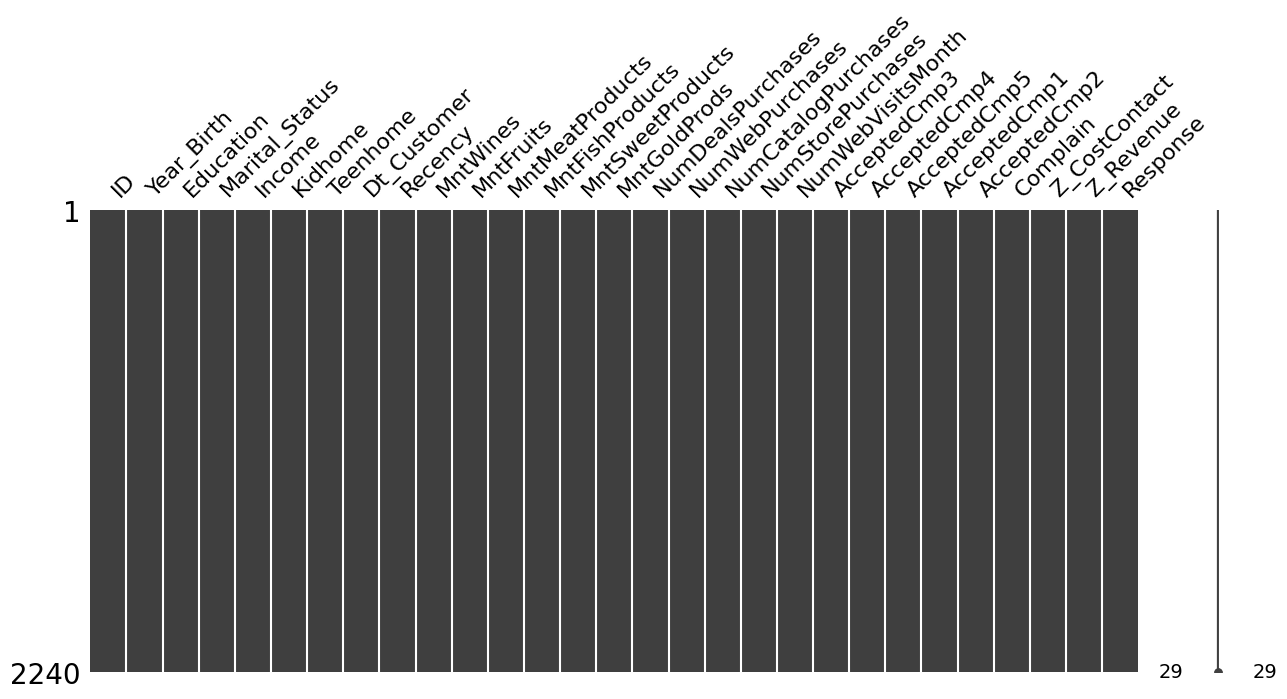

In [83]:
# Assuming your dataset is already loaded into a DataFrame called df
msno.matrix(df, figsize=(15, 6))

import matplotlib.pyplot as plt
plt.show()

In [84]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

# Check Duplicate

In [85]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [86]:
df.drop_duplicates(inplace=True)

# Outlier Checker

<ipython-input-87-69f9c14f3aba>:41: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9, hspace=0.4)


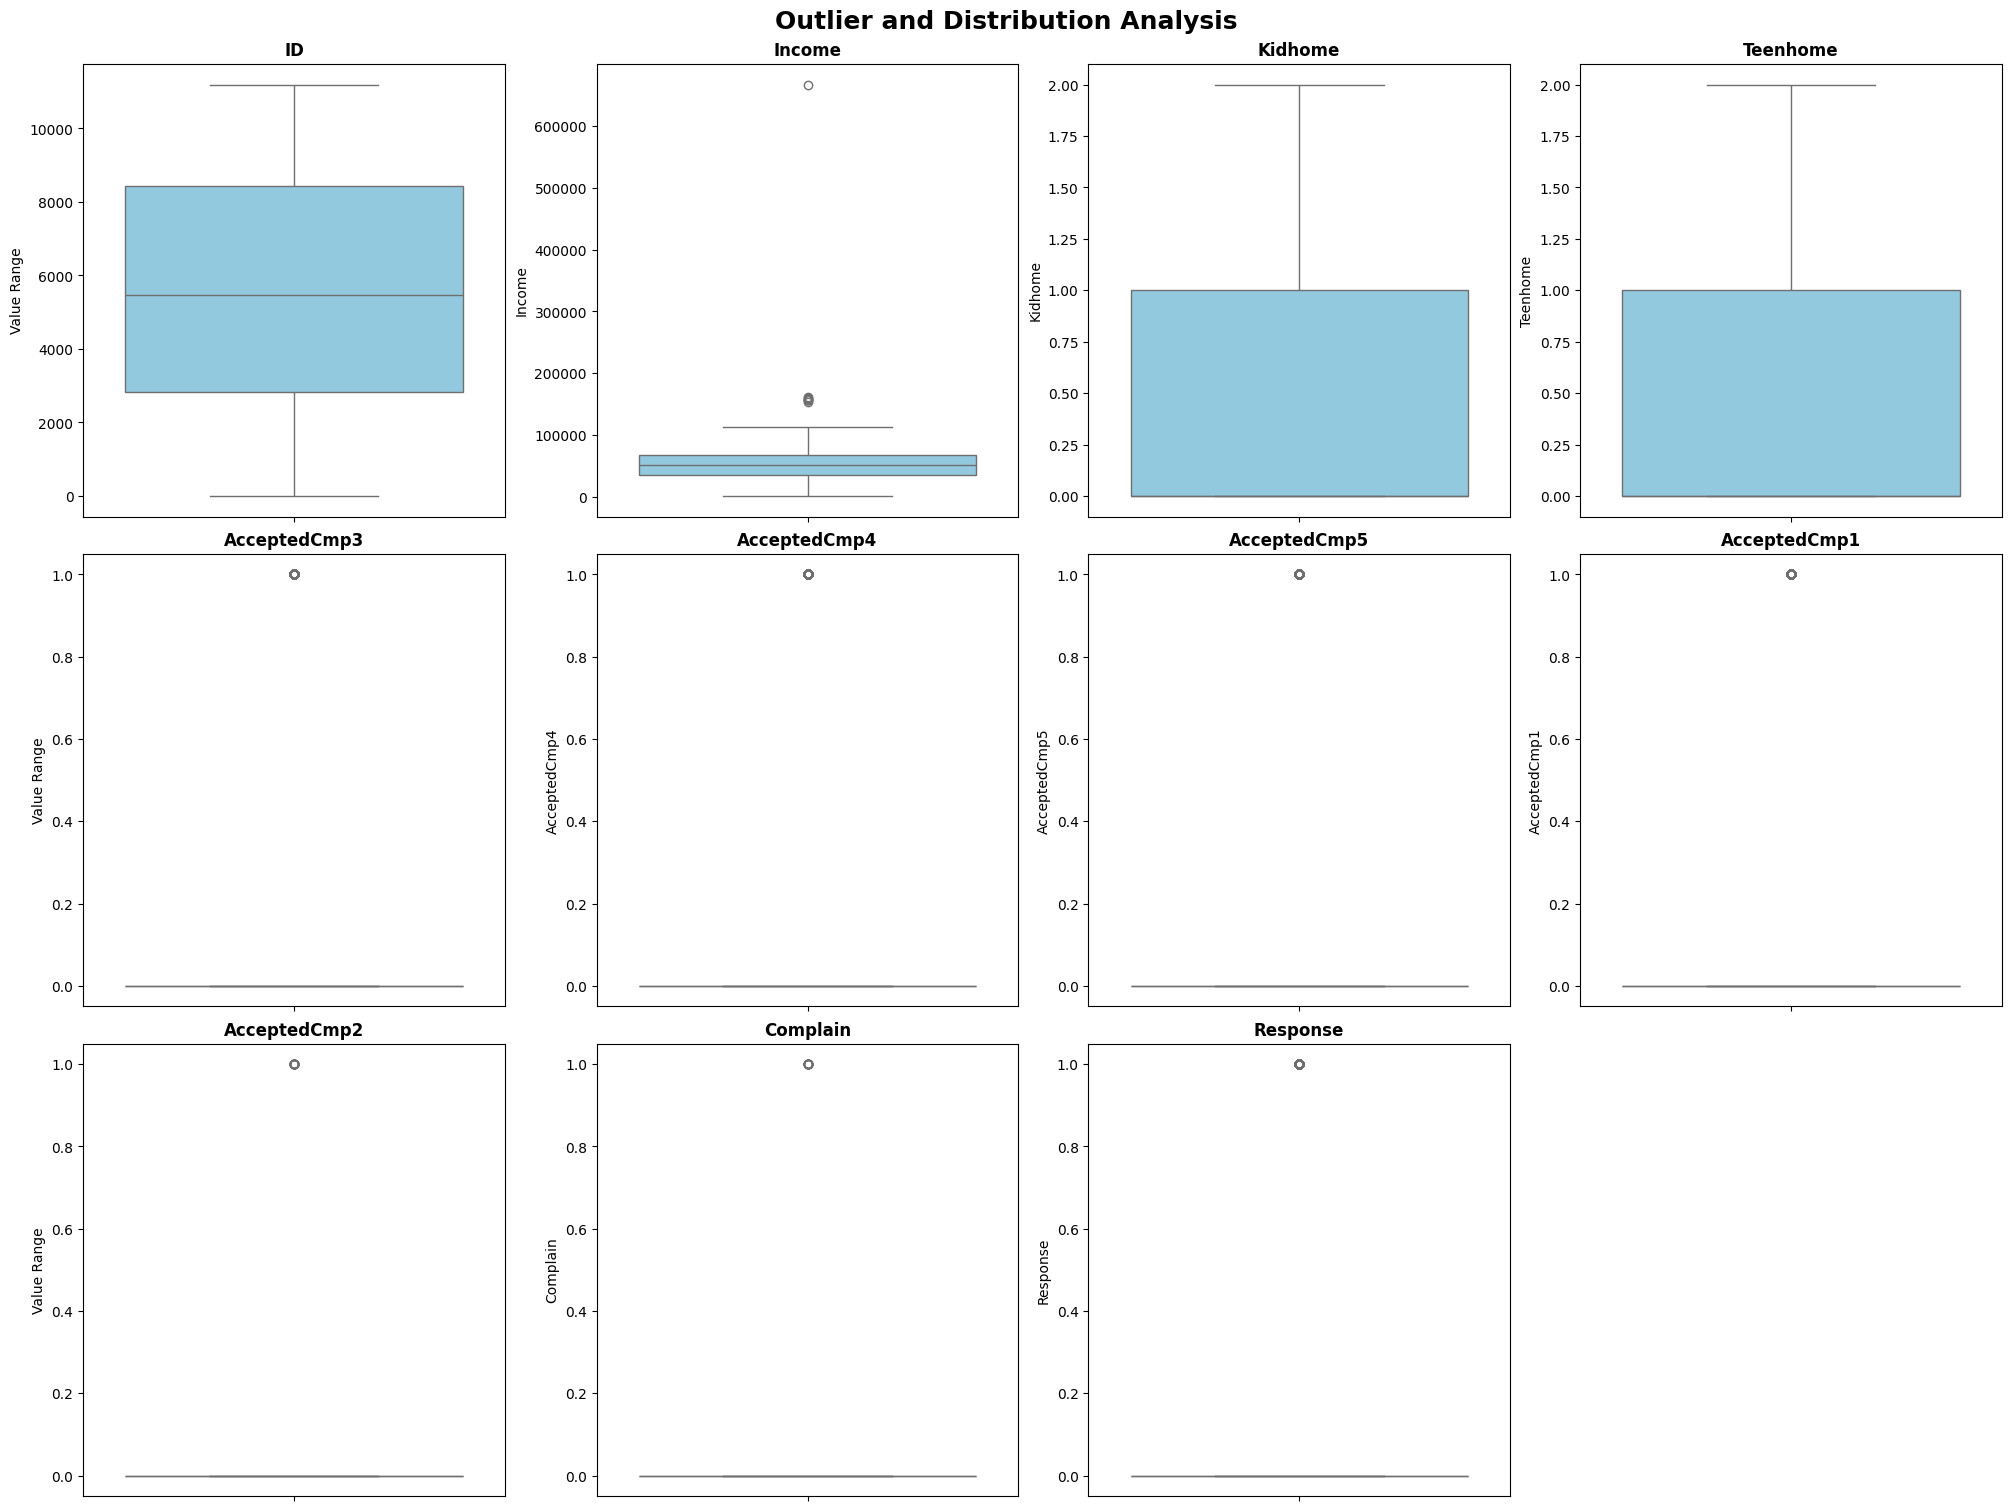

In [87]:
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include='number').columns.tolist()

# Exclude certain columns
excluded_columns = ['Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign_1',
                    'Campaign_4', 'Campaign_5', 'Campaign_1', 'Campaign_2', 'Campaign_3', 'Z_CostContact', 'Z_Revenue']

# Filter df_numeric to exclude the above columns
df_numeric = [col for col in df_numeric if col not in excluded_columns]

# Function to visualize distribution and detect outliers using boxplots
def visualize_distributions(df, features, layout=(4, 4), title='Outlier and Distribution Analysis', figsize=(20, 15)):

    # Calculate total plots required
    total_plots = len(features)

    # Adjust layout based on number of features
    rows = (total_plots + layout[1] - 1) // layout[1]  # Calculate rows dynamically
    cols = layout[1]

    # Initialize the figure
    fig = plt.figure(constrained_layout=True, figsize=figsize)
    fig.suptitle(title, fontsize=18, weight='bold')

    # Create subplots dynamically
    grid = fig.add_gridspec(rows, cols) # Update grid with adjusted rows

    for idx, feature in enumerate(features):
        ax = fig.add_subplot(grid[idx // cols, idx % cols])
        sns.boxplot(y=df[feature], ax=ax, orient='v', color='skyblue')
        ax.set_title(f'{feature}', fontsize=12, weight='semibold')
        if idx % cols == 0:
            ax.set_ylabel('Value Range', fontsize=10)

    # Adjust layout for better spacing
    plt.subplots_adjust(top=0.9, hspace=0.4)

# Example usage
visualize_distributions(df=df, features=df_numeric, layout=(4, 4), title='Outlier and Distribution Analysis')

In [88]:
import datetime  # Import the datetime module

# Get the current year
current_year = datetime.datetime.now().year

# Calculate age
df['Age'] = current_year - df['Year_Birth']

# Initialize 'Age_Group' column
df['Age_Group'] = ""

# Assigning age groups based on the given birth year ranges
for i, birth in enumerate(df['Year_Birth']):
    if 1997 <= birth <= 2012:
        df.loc[i, 'Age_Group'] = "Gen Z 12-27"
    elif 1981 <= birth <= 1996:
        df.loc[i, 'Age_Group'] = "Millennials 28-43"
    elif 1965 <= birth <= 1980:
        df.loc[i, 'Age_Group'] = "Gen X 44-59"
    elif 1955 <= birth <= 1964:
        df.loc[i, 'Age_Group'] = "Boomers II 60-69"
    elif 1946 <= birth <= 1954:
        df.loc[i, 'Age_Group'] = "Boomers I 70-78"

# Check the distribution of Age Groups
print(df['Age_Group'].value_counts())

Age_Group
Gen X 44-59          1069
Boomers II 60-69      467
Millennials 28-43     385
Boomers I 70-78       292
                       27
Name: count, dtype: int64


Pada table diatas terdapat pelanggan yang sudah berusia lebih dari 70 Tahun ini merupakan hal yang aneh maka kita perlu drop data tersebut

In [89]:
# Drop outliers according to upper bound
df = df[df['Age'] < 80]

# Data Cleaning

In [90]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

Column Name       Data Type  Data Count  Missing Value  \
0                    ID           int64        2221              0   
1            Year_Birth           int64        2221              0   
2             Education          object        2221              0   
3        Marital_Status          object        2221              0   
4                Income         float64        2221              0   
5               Kidhome           int64        2221              0   
6              Teenhome           int64        2221              0   
7           Dt_Customer  datetime64[ns]        2221              0   
8               Recency           int64        2221              0   
9              MntWines           int64        2221              0   
10            MntFruits           int64        2221              0   
11      MntMeatProducts           int64        2221              0   
12      MntFishProducts           int64        2221              0   
13     MntSweetProducts           int64        2221              0   
14         MntGoldProds           int64        2221              0   
15    NumDealsPurchases           int64        2221              0   
16      NumWebPurchases           int64        2221              0   
17  NumCatalogPurchases           int64        2221              0   
18    NumStorePurchases           int64        2221              0   
19    NumWebVisitsMonth           int64        2221              0   
20         AcceptedCmp3           int64        2221              0   
21         AcceptedCmp4           int64        2221              0   
22         AcceptedCmp5           int64        2221              0   
23         AcceptedCmp1           int64        2221              0   
24         AcceptedCmp2           int64        2221              0   
25             Complain           int64        2221              0   
26        Z_CostContact           int64        2221              0   
27            Z_Revenue           int64        2221              0   
28             Response           int64        2221              0   
29                  Age           int64        2221              0   
30            Age_Group          object        2221              0   

    Missing Value Percentage  Number of Unique  \
0                        0.0              2221   
1                        0.0                52   
2                        0.0                 5   
3                        0.0                 8   
4                        0.0              1958   
5                        0.0                 3   
6                        0.0                 3   
7                        0.0               663   
8                        0.0               100   
9                        0.0               770   
10                       0.0               158   
11                       0.0               551   
12                       0.0               181   
13                       0.0               177   
14                       0.0               213   
15                       0.0                15   
16                       0.0                15   
17                       0.0                14   
18                       0.0                14   
19                       0.0                16   
20                       0.0                 2   
21                       0.0                 2   
22                       0.0                 2   
23                       0.0                 2   
24                       0.0                 2   
25                       0.0                 2   
26                       0.0                 1   
27                       0.0                 1   
28                       0.0                 2   
29                       0.0                52   
30                       0.0                 5   

                                        Unique Sample  
0   [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...  
1   [1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...  
2 

# Renamin Column Name

In [91]:
# Define a dictionary with original column names as keys and readable names as values

rename_dict = {
    'ID': 'Customer_ID',
    'Year_Birth': 'Birth year',
    'Marital_Status': 'Relationship status',
    'Recency': 'Last_Purchase',
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweet',
    'MntGoldProds': 'Gold',
    'AcceptedCmp1': 'Campaign_1',
    'AcceptedCmp2': 'Campaign_2',
    'AcceptedCmp3': 'Campaign_3',
    'AcceptedCmp4': 'Campaign_4',
    'AcceptedCmp5': 'Campaign_5',
    'NumDealsPurchases': 'Purchase_with_discounts',
    'NumWebPurchases': 'Web_Purchase',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumStorePurchases': 'Store_Purchases',
    'NumWebVisitsMonth': 'Web_Visits',
    'Complain': 'Customer_Complaints',
    'Z_CostContact': 'Cost_of_Contact',
    'Z_Revenue': 'Revenue',
    'Response': 'Overall_Response'
}

# Rename the columns in the DataFrame
df.rename(columns=rename_dict, inplace=True)

# Display the first few rows to verify the changes
df.head()


<ipython-input-91-971afbed8119>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_dict, inplace=True)


Customer_ID  Birth year   Education Relationship status   Income  Kidhome  \
0         5524        1957  Graduation              Single  58138.0        0   
1         2174        1954  Graduation              Single  46344.0        1   
2         4141        1965  Graduation            Together  71613.0        0   
3         6182        1984  Graduation            Together  26646.0        1   
4         5324        1981         PhD             Married  58293.0        1   

   Teenhome Dt_Customer  Last_Purchase  Wines  ...  Campaign_4  Campaign_5  \
0         0  2012-09-04             58    635  ...           0           0   
1         1  2014-03-08             38     11  ...           0           0   
2         0  2013-08-21             26    426  ...           0           0   
3         0  2014-02-10             26     11  ...           0           0   
4         0  2014-01-19             94    173  ...           0           0   

   Campaign_1  Campaign_2  Customer_Complaints  Cost_of_Contact  Revenue  \
0           0           0                    0                3       11   
1           0           0                    0                3       11   
2           0           0                    0                3       11   
3           0           0                    0                3       11   
4           0           0                    0                3       11   

   Overall_Response  Age          Age_Group  
0                 1   67   Boomers II 60-69  
1                 0   70    Boomers I 70-78  
2                 0   59        Gen X 44-59  
3                 0   40  Millennials 28-43  
4                 0   43  Millennials 28-43  

[5 rows x 31 columns]

In [92]:
# Convert 'Education' to lowercase to ensure consistency
df['Education'] = df['Education'].str.lower()

# Define the mapping
education_mapping = {
    'graduation': 'Undergraduate',
    'basic': 'School',
    '2c cycle': 'Postgraduate',
    'phd': 'Postgraduate',
    'master': 'Postgraduate'
}

# Apply the mapping to create a new categorized column
df['Education'] = df['Education'].map(education_mapping)

# Check the result
df['Education']

<ipython-input-92-a88bef3c53a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].str.lower()


0       Undergraduate
1       Undergraduate
2       Undergraduate
3       Undergraduate
4        Postgraduate
            ...      
2235    Undergraduate
2236     Postgraduate
2237    Undergraduate
2238     Postgraduate
2239     Postgraduate
Name: Education, Length: 2221, dtype: object

#Renaming Marital Status

In [93]:
# Convert Relationship status to lowercase to ensure consistency
df.loc[:, 'Relationship status'] = df['Relationship status'].str.lower()

# Define the mapping
status_mapping = {
    'absurd': 'Single',
    'alone': 'Single',
    'divorced': 'Single',
    'single': 'Single',
    'widow': 'Single',
    'yolo': 'Single',
    'married': 'In relationship',
    'together': 'In relationship'
}

# Apply the mapping to create a new categorized column
df.loc[:, 'Relationship_Status'] = df['Relationship status'].map(status_mapping)
df.drop('Relationship status', axis=1, inplace=True)



# Check the result
df['Relationship_Status'].value_counts()


Relationship_Status
In relationship    1436
Single              785
Name: count, dtype: int64

# Categerized Family Kids and Amount of Customer Purchase

In [94]:
# Check if the required coumns exist
if all(col in df.columns for col in ['Kidhome', 'Teenhome', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']):

    # Create 'Children' column
    df['Children'] = df['Kidhome'] + df['Teenhome']

    # Create 'Total_Purchase' column
    df['Total_Purchase'] = df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum(axis=1)

    # Drop 'Number_of_Kids' and 'Number_of_Teens' columns
    df.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

    # Display the result
    print(df[['Children', 'Total_Purchase']].head())

df

   Children  Total_Purchase
0         0            1617
1         2              27
2         0             776
3         1              53
4         1             422


Customer_ID  Birth year      Education   Income Dt_Customer  \
0            5524        1957  Undergraduate  58138.0  2012-09-04   
1            2174        1954  Undergraduate  46344.0  2014-03-08   
2            4141        1965  Undergraduate  71613.0  2013-08-21   
3            6182        1984  Undergraduate  26646.0  2014-02-10   
4            5324        1981   Postgraduate  58293.0  2014-01-19   
...           ...         ...            ...      ...         ...   
2235        10870        1967  Undergraduate  61223.0  2013-06-13   
2236         4001        1946   Postgraduate  64014.0  2014-06-10   
2237         7270        1981  Undergraduate  56981.0  2014-01-25   
2238         8235        1956   Postgraduate  69245.0  2014-01-24   
2239         9405        1954   Postgraduate  52869.0  2012-10-15   

      Last_Purchase  Wines  Fruits  Meat  Fish  ...  Campaign_2  \
0                58    635      88   546   172  ...           0   
1                38     11       1     6     2  ...           0   
2                26    426      49   127   111  ...           0   
3                26     11       4    20    10  ...           0   
4                94    173      43   118    46  ...           0   
...             ...    ...     ...   ...   ...  ...         ...   
2235             46    709      43   182    42  ...           0   
2236             56    406       0    30     0  ...           0   
2237             91    908      48   217    32  ...           0   
2238              8    428      30   214    80  ...           0   
2239             40     84       3    61     2  ...           0   

      Customer_Complaints  Cost_of_Contact  Revenue  Overall_Response  Age  \
0                       0                3       11                 1   67   
1                       0                3       11                 0   70   
2                       0                3       11                 0   59   
3                       0                3       11                 0   40   
4                       0                3       11                 0   43   
...                   ...              ...      ...               ...  ...   
2235                    0                3       11                 0   57   
2236                    0                3       11                 0   78   
2237                    0                3       11                 0   43   
2238                    0                3       11                 0   68   
2239                    0                3       11                 1   70   

              Age_Group  Relationship_Status  Children  Total_Purchase  
0      Boomers II 60-69               Single         0            1617  
1       Boomers I 70-78               Single         2              27  
2           Gen X 44-59      In relationship         0             776  
3     Millennials 28-43      In relationship         1              53  
4     Millennials 28-43      In relationship         1             422  
...                 ...                  ...       ...             ...  
2235        Gen X 44-59      In relationship         1            1341  
2236    Boomers I 70-78      In relationship         3             444  
2237  Millennials 28-43               Single         0            1241  
2238   Boomers II 60-69      In relationship         1             843  
2239    Boomers I 70-78      In relationship         2             172  

[2221 rows x 31 columns]

In [95]:
# Sample DataFrame creation (assuming df is already defined)
# df = pd.read_csv('your_file.csv')  # Uncomment and modify if reading from a file

# Define income bins and labels
bins = [1730, 35694, 51650, 68277.5, 162397]
labels = ['Low', 'Middle', 'High', 'Very High']

# Create the 'Income_Category' column based on the defined bins
df['Income_Category'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

# Display the result
print(df[['Income', 'Income_Category']].head())

    Income Income_Category
0  58138.0            High
1  46344.0          Middle
2  71613.0       Very High
3  26646.0             Low
4  58293.0            High


In [96]:
product_columns = ['Wines', 'Meat', 'Gold', 'Fish', 'Sweet', 'Fruits']

# Create a list to store product types for each customer
all_product_types = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    # Determine the product types purchased by the customer (example logic)
    customer_product_types = [product for product in product_columns if row[product] > 0]
    all_product_types.append(customer_product_types)

# Assign the list of product types to the 'Product_Types' column
df['Product_Types'] = all_product_types

df['Product_Types']

0       [Wines, Meat, Gold, Fish, Sweet, Fruits]
1       [Wines, Meat, Gold, Fish, Sweet, Fruits]
2       [Wines, Meat, Gold, Fish, Sweet, Fruits]
3       [Wines, Meat, Gold, Fish, Sweet, Fruits]
4       [Wines, Meat, Gold, Fish, Sweet, Fruits]
                          ...                   
2235    [Wines, Meat, Gold, Fish, Sweet, Fruits]
2236                         [Wines, Meat, Gold]
2237    [Wines, Meat, Gold, Fish, Sweet, Fruits]
2238    [Wines, Meat, Gold, Fish, Sweet, Fruits]
2239    [Wines, Meat, Gold, Fish, Sweet, Fruits]
Name: Product_Types, Length: 2221, dtype: object

# Data Visualization

# General Data


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2221 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customer_ID              2221 non-null   int64         
 1   Birth year               2221 non-null   int64         
 2   Education                2020 non-null   object        
 3   Income                   2221 non-null   float64       
 4   Dt_Customer              2221 non-null   datetime64[ns]
 5   Last_Purchase            2221 non-null   int64         
 6   Wines                    2221 non-null   int64         
 7   Fruits                   2221 non-null   int64         
 8   Meat                     2221 non-null   int64         
 9   Fish                     2221 non-null   int64         
 10  Sweet                    2221 non-null   int64         
 11  Gold                     2221 non-null   int64         
 12  Purchase_with_discounts  2221 non-null 

# Distribution of Age, Income, and Marital Status Affecting Purchase Patterns

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

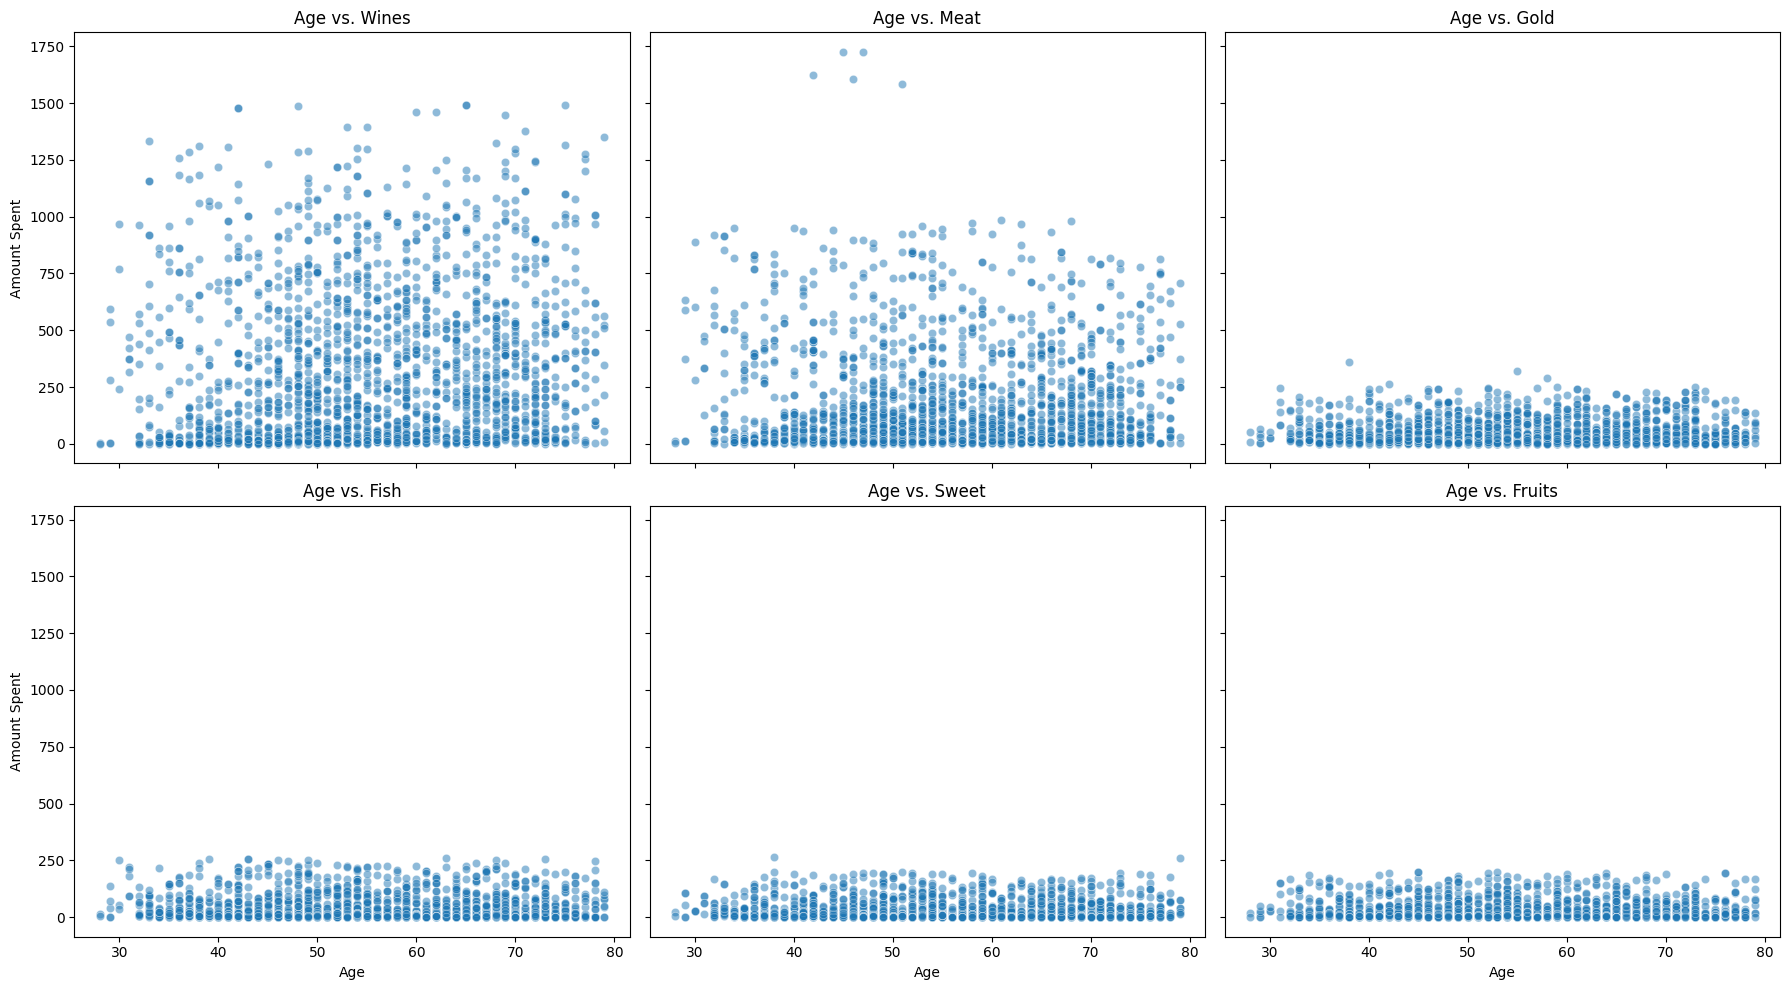

In [99]:
# Create scatter plots for each product category
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, product in zip(axes, product_columns):
    sns.scatterplot(data=df, x='Age', y=product, ax=ax, alpha=0.5)
    ax.set_title(f'Age vs. {product}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Amount Spent')

plt.tight_layout()
plt.show()

# Influence of Age, Income, Relationship Status, and Number of Children on Product Categories Purchased


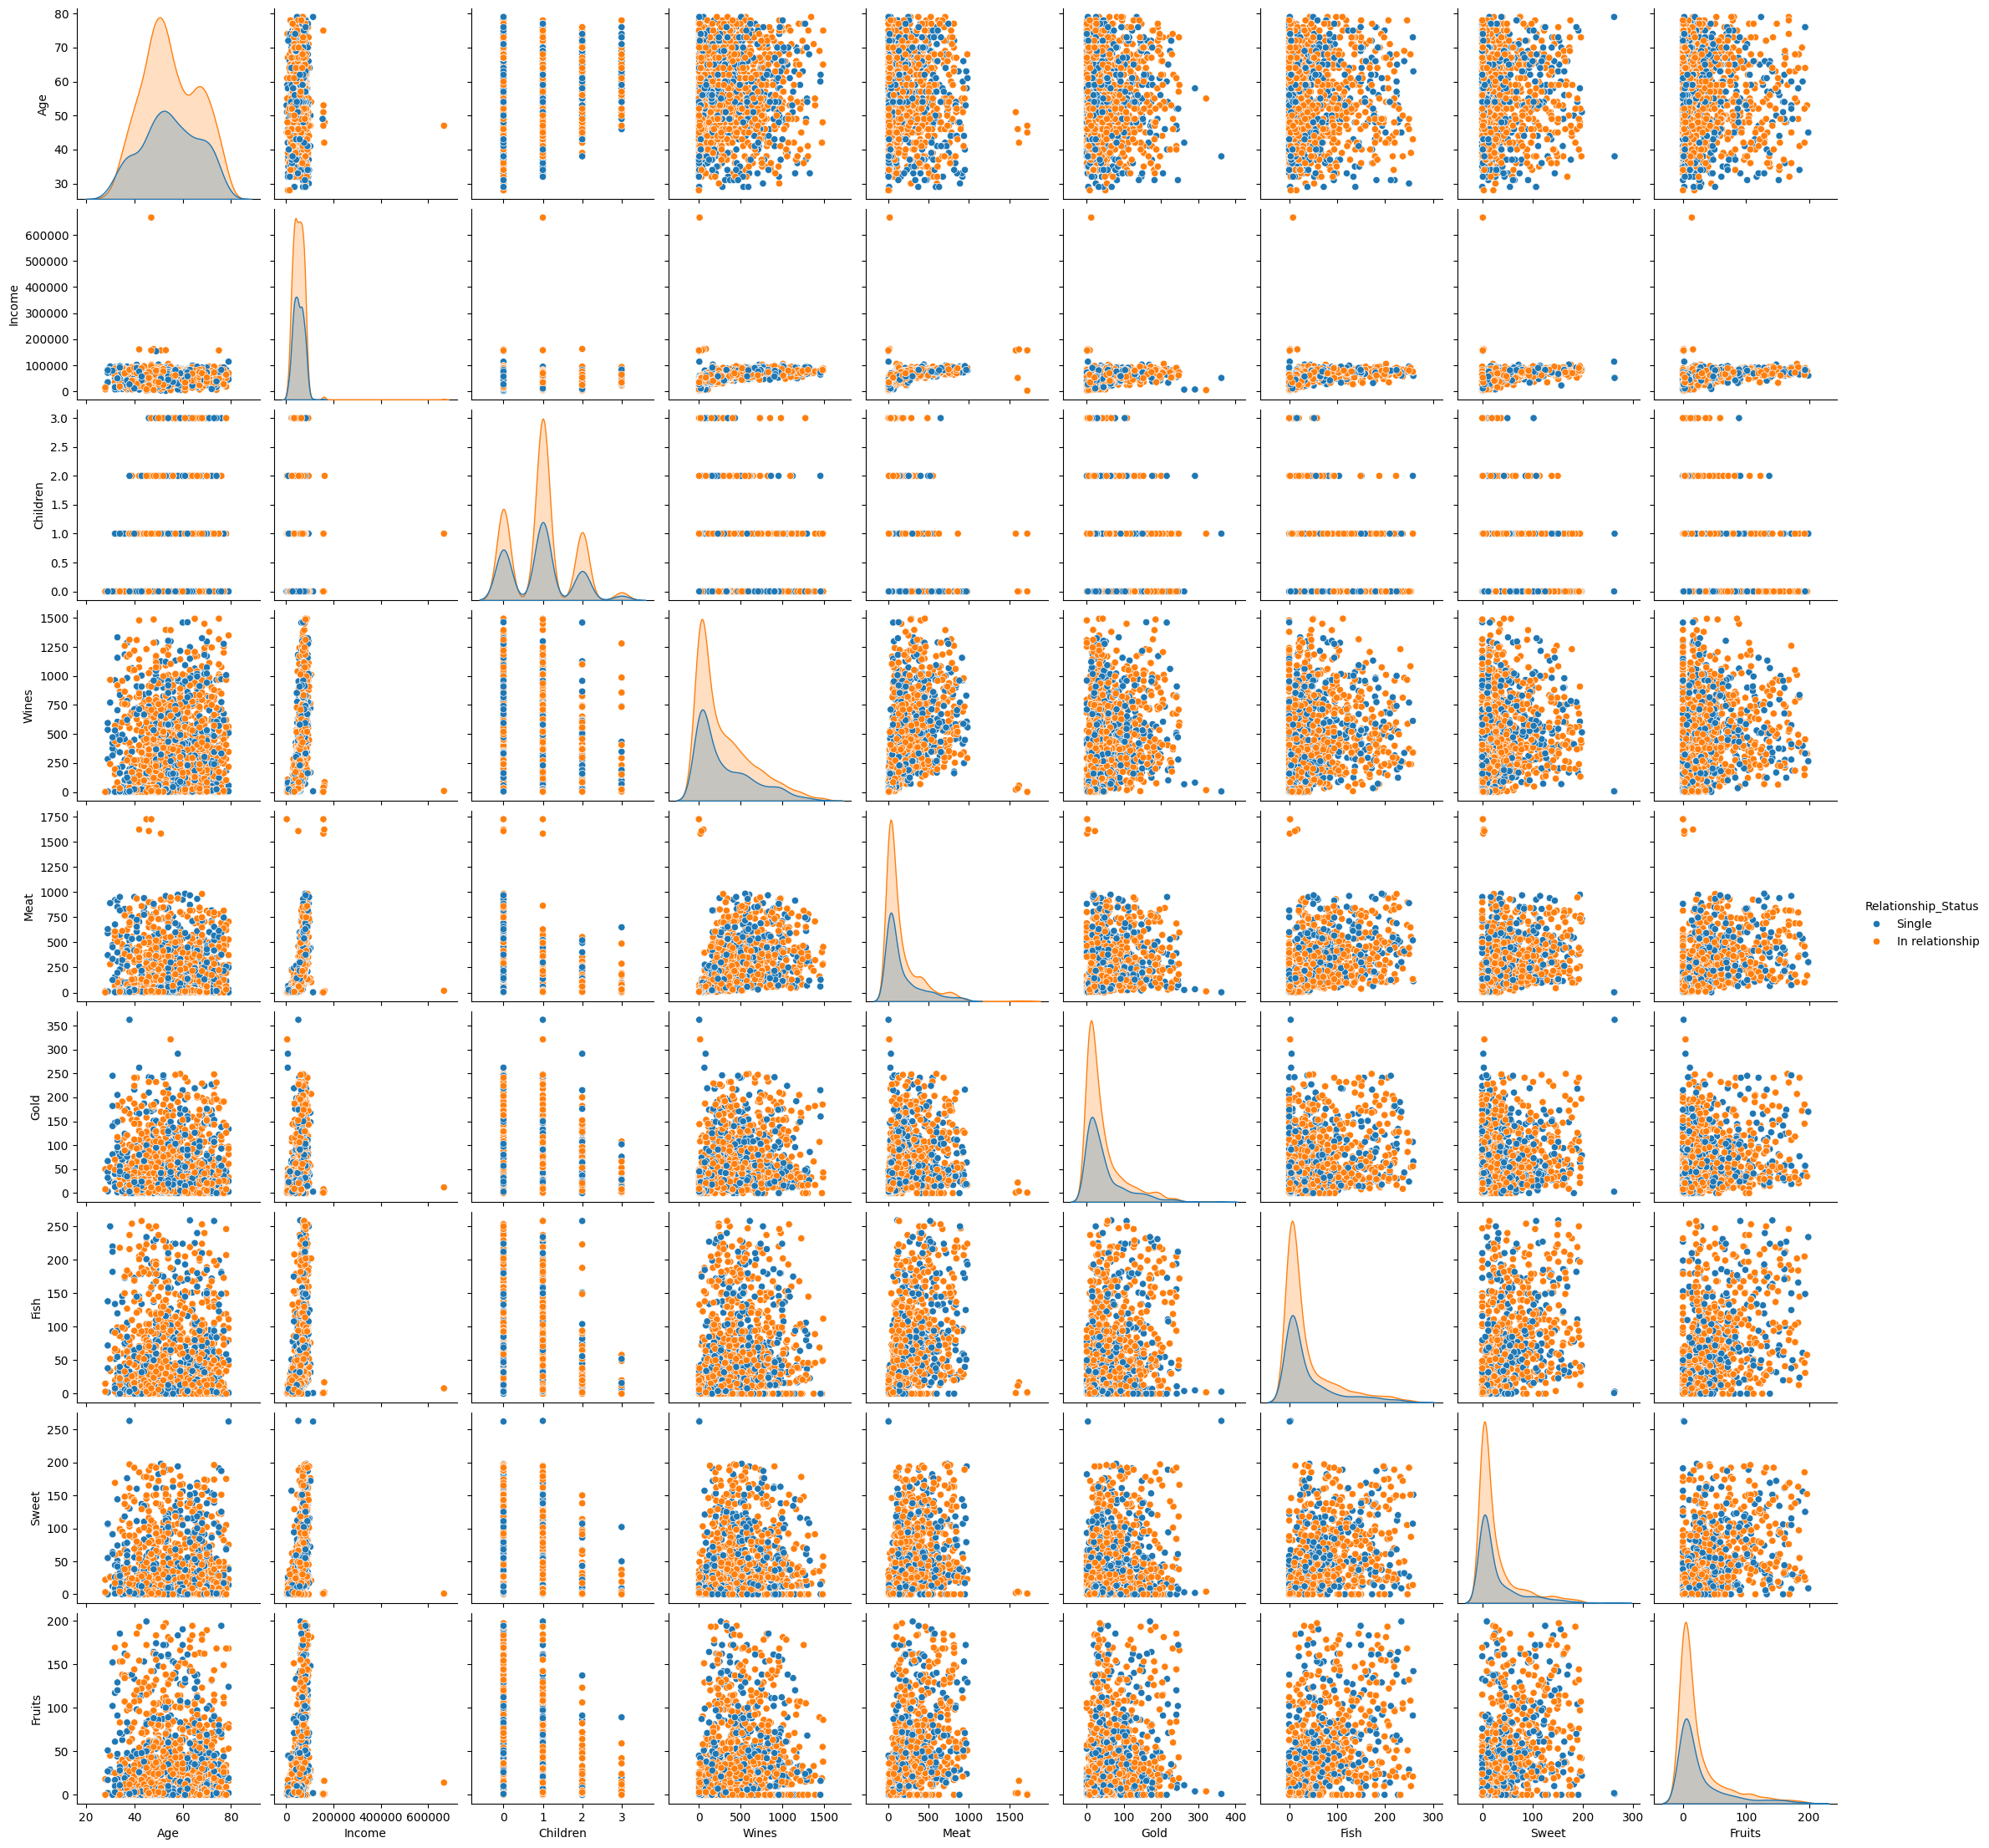

In [100]:
# Pairplot to visualize relationships between Age, Income, Children, and Product Categories
sns.pairplot(df, vars=['Age', 'Income', 'Children'] + product_columns, hue='Relationship_Status')
plt.show()


# Influence of Age, Income, Relationship Status, and Number of Children on Product Categories Purchased

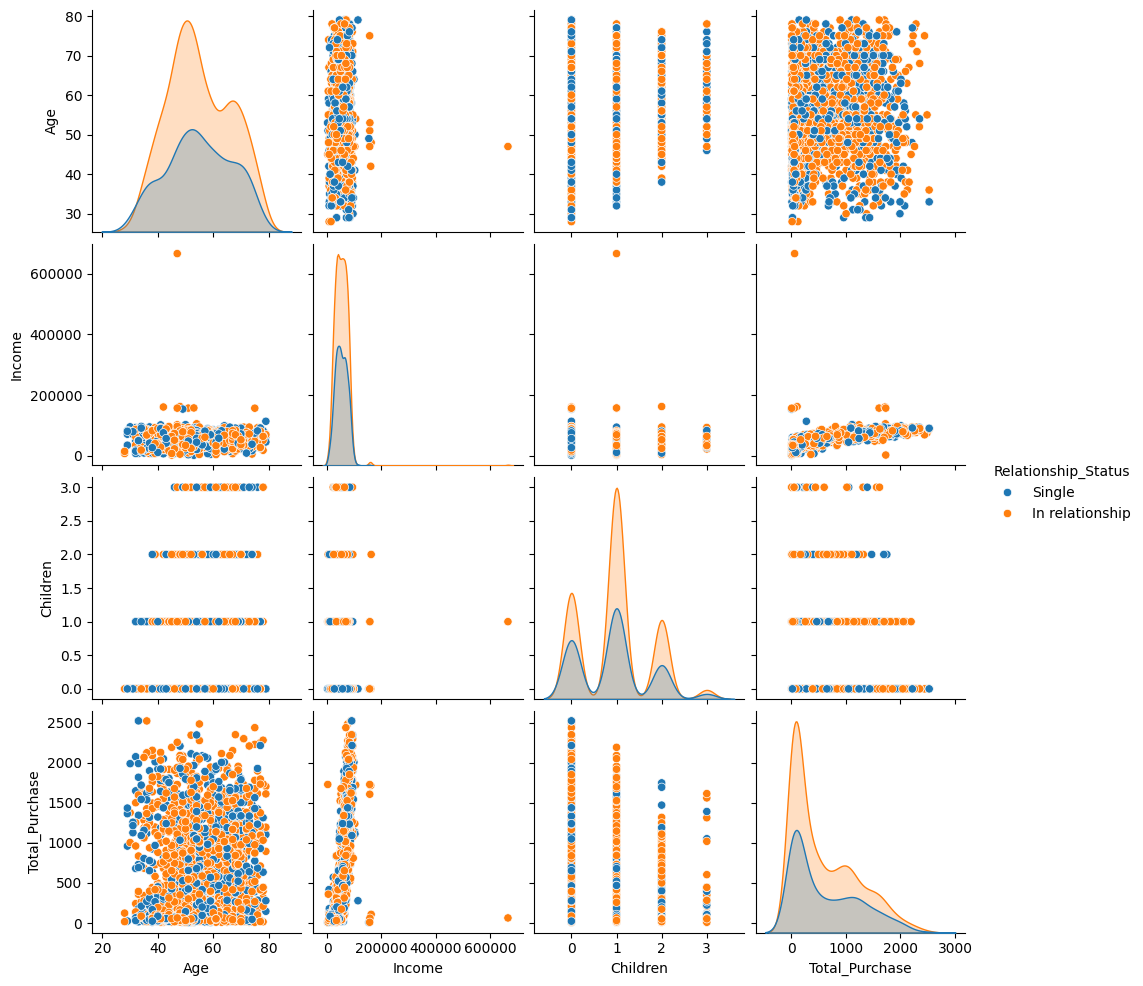

In [101]:
# Scatterplot matrix to see the influence of Age, Income, Relationship Status, and Number of Children on Total Purchase
sns.pairplot(df, vars=['Age', 'Income', 'Children', 'Total_Purchase'], hue='Relationship_Status')
plt.show()

# Commonly Purchased Products Together and How to Use This to Increase Sales


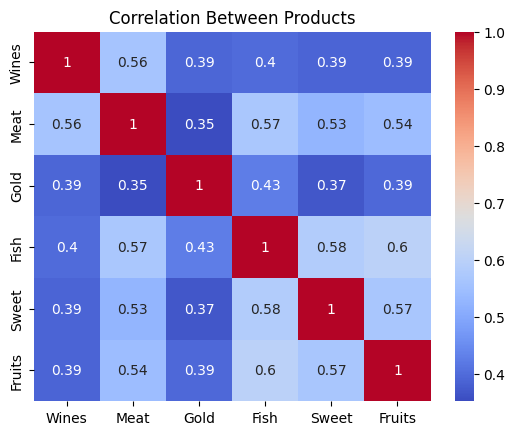

In [102]:
# Correlation matrix for products to find products that are often purchased together
corr = df[product_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Products')
plt.show()

# Products with the Highest and Lowest Sales Rate



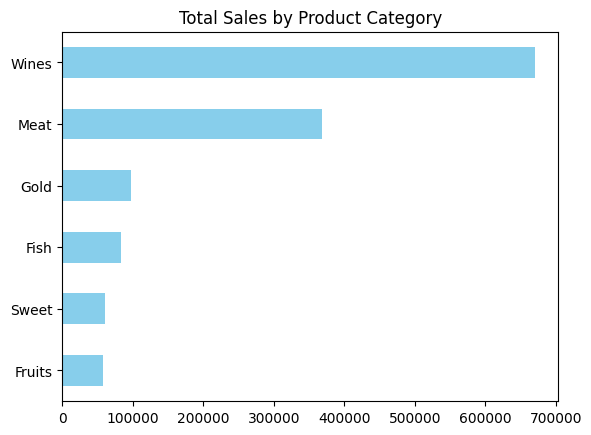

In [103]:
# Bar plot for total sales of each product category
total_sales = df[product_columns].sum()
total_sales.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Category')
plt.show()

#  Effectiveness of Each Campaign on Product Category Revenue

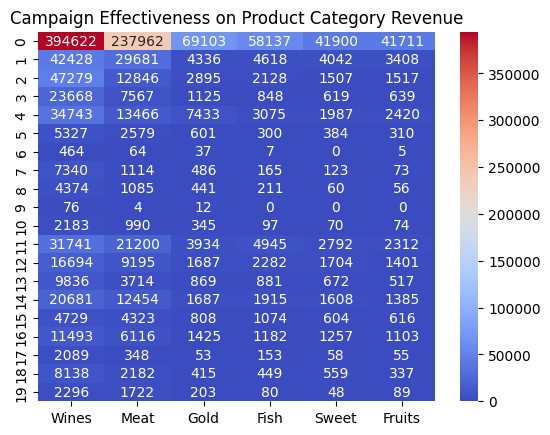

In [104]:
# Assuming df_campaign is already defined as shown in your code
campaign_columns = ['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']
df_campaign = df[campaign_columns + product_columns]

# # Calculate campaign effectiveness
campaign_effectiveness = df_campaign.groupby(campaign_columns).sum().reset_index()

# Plot the heatmap with formatted annotations
sns.heatmap(campaign_effectiveness[product_columns], annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Campaign Effectiveness on Product Category Revenue')
plt.show()

In [105]:
# Assuming 'df' is your DataFrame
df.to_csv('capstone_project_2.csv', index=False)
df.to_excel('capstone_project_2.xlsx', index=False)
